<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       8 non-null      int64         
 1   booking_date  8 non-null      datetime64[ns]
 2   product_id    8 non-null      int64         
 3   revenue       8 non-null      int64         
 4   channel       8 non-null      object        
 5   region        8 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 516.0+ bytes


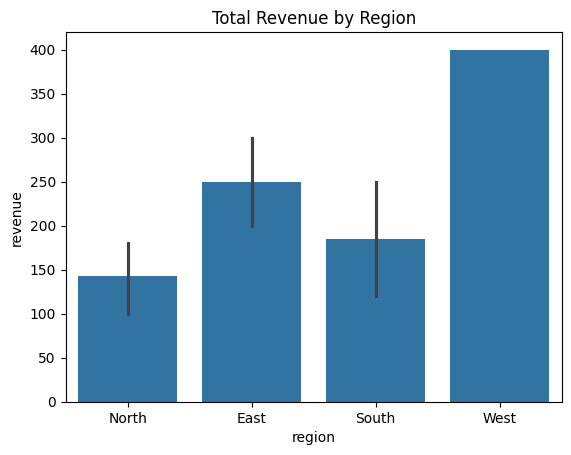

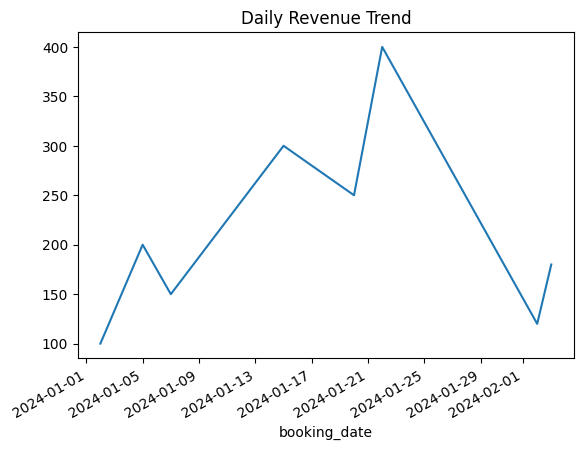

,user_id,booking_date,product_id,revenue,channel,region,month,weekday,day_type,rolling_avg,anomaly
6,102,2024-02-02,1,120,Store,South,2,4,Weekday,256.666667,True


In [4]:
import pandas as pd

# Step 1: Create bookings dataset
data_bookings = {
    'user_id': [101, 102, 103, 101, 104, 105, 102, 103],
    'booking_date': pd.to_datetime([
        '2024-01-02', '2024-01-05', '2024-01-07',
        '2024-01-15', '2024-01-20', '2024-01-22',
        '2024-02-02', '2024-02-03'
    ]),
    'product_id': [1, 2, 1, 3, 2, 3, 1, 2],
    'revenue': [100, 200, 150, 300, 250, 400, 120, 180],
    'channel': ['Online', 'Store', 'Online', 'Store', 'Online', 'Store', 'Store', 'Online'],
    'region': ['North', 'East', 'North', 'East', 'South', 'West', 'South', 'North']
}
bookings = pd.DataFrame(data_bookings)
bookings.head()
!pip install seaborn matplotlib
bookings.head()        # First 5 rows
bookings.info()        # Columns + data types
bookings.describe()    # Summary of numbers
bookings["month"] = bookings["booking_date"].dt.month
bookings["weekday"] = bookings["booking_date"].dt.dayofweek
bookings["day_type"] = bookings["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

bookings.groupby("region")["revenue"].sum().sort_values(ascending=False)
bookings.groupby("channel")["revenue"].mean()
bookings.groupby("month")["revenue"].sum()
import seaborn as sns
import matplotlib.pyplot as plt

# Revenue by region (bar chart)
sns.barplot(x="region", y="revenue", data=bookings)
plt.title("Total Revenue by Region")
plt.show()

# Revenue over time
bookings.groupby("booking_date")["revenue"].sum().plot(kind="line", title="Daily Revenue Trend")
plt.show()
user_spend = bookings.groupby("user_id")["revenue"].sum().reset_index()
user_spend.sort_values(by="revenue", ascending=False)
bookings = bookings.sort_values("booking_date")
bookings["rolling_avg"] = bookings["revenue"].rolling(window=3).mean()
bookings["anomaly"] = bookings["revenue"] < (bookings["rolling_avg"] - bookings["revenue"].std())

bookings[bookings["anomaly"] == True]

#So, any booking much lower than its rolling average is flagged as an anomaly.